<a href="https://colab.research.google.com/github/oleksiyo/machine-learning-zoomcamp/blob/master/cohorts/2025/10-kubernetes/Homework_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K8S

## Building the image

Clone the course repo if you haven't:

`git clone https://github.com/DataTalksClub/machine-learning-zoomcamp.git`

Go to the course-zoomcamp/cohorts/2025/05-deployment/homework folder and execute the following:

`docker build -f Dockerfile_full -t zoomcamp-model:3.13.10-hw10 .`

## Question 1

Run it to test that it's working locally:

`docker run -it --rm -p 9696:9696 zoomcamp-model:3.13.10-hw10`

And in another terminal, execute q6_test.py file:

`python q6_test.py`

You should see this:

`{'conversion_probability': <value>, 'conversion': False}`

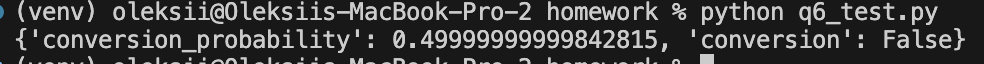

**Answer**: 0.49

## Question 2

***Installing kubectl and kind***
*   kubectl - https://kubernetes.io/docs/tasks/tools/
*   kind - https://kind.sigs.k8s.io/docs/user/quick-start/

What's the version of `kind` that you have?

Use `kind --version` to find out.

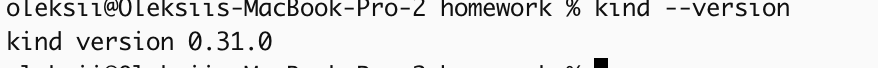

**Answer**: 0.31.0

### Creating a cluster

Now let's create a cluster with kind:

`kind create cluster`

And check with kubectl that it was successfully created:

`kubectl cluster-info`

## Question 3

What's the smallest deployable computing unit that we can create and manage in Kubernetes (kind in our case)?

**Answer**: Pod

## Question 4

Now let's test if everything works. Use kubectl to get the list of running services.

What's the Type of the service that is already running there?

`kubectl get svc`

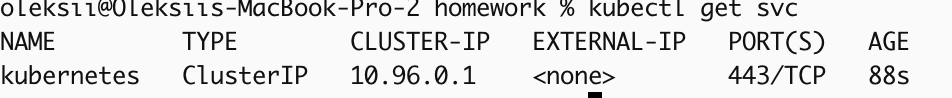

**Answer**: ClusterIP

## Question 5

To be able to use the docker image we previously created (zoomcamp-model:3.13.10-hw10), we need to register it with kind.

**Answer**: `kind load docker-image`

## Question 6

Now let's create a deployment config (e.g. deployment.yaml):


```yml
apiVersion: apps/v1
kind: Deployment
metadata:
  name: subscription
spec:
  selector:
    matchLabels:
      app: subscription
  replicas: 1
  template:
    metadata:
      labels:
        app: subscription
    spec:
      containers:
      - name: subscription
        image: <Image>
        resources:
          requests:
            memory: "64Mi"
            cpu: "100m"            
          limits:
            memory: <Memory>
            cpu: <CPU>
        ports:
        - containerPort: <Port>
```

Replace **Image, Memory, CPU>, Port>** with the correct values.

What is the value for <Port?

Image = zoomcamp-model:3.13.10-hw10

Memory = 128Mi

CPU = 200m

Port = 9696


**Answer**: 9696

## Question 7

Let's create a service for this deployment (service.yaml):

```
apiVersion: v1
kind: Service
metadata:
  name: <Service name>
spec:
  type: LoadBalancer
  selector:
    app: <???>
  ports:
  - port: 80
    targetPort: <PORT>
```



Fill it in. What do we need to write instead of <???>?

Apply this config file.

**Answer**: subscription

## Question 8

**Answer**: 1